In [97]:
print(R.version)

               _                           

platform       x86_64-w64-mingw32          

arch           x86_64                      

os             mingw32                     

system         x86_64, mingw32             

status                                     

major          4                           

minor          1.3                         

year           2022                        

month          03                          

day            10                          

svn rev        81868                       

language       R                           

version.string R version 4.1.3 (2022-03-10)

nickname       One Push-Up                 


In [98]:
###radiation data: The Amount of Radiation when microwave oven is open and closed###
oven_no = 1:42
radiation_closed=c(.15,.09,.18,.10,.05,.12,.08,.05,.08,.10,.07,.02,.01,.10,.10,.10,.02,.10,.01,.40,.10,.05,.03,.05,.15,.10,.15,.09,.08,.18,.10,.20,.11,.30,.02,.20,.20,.30,.30,.40,.30,.05)
radiation_open=c(0.3,0.09,0.3,0.1,.1,.12,.09,.1,.09,.1,.07,.05,.01,.45,.12,.2,.04,.1,.01,.6,.12,.10,.05,.05,
                 .15,.3,.15,.09,.09,.28,.10,.1,.1,.3,.12,.25,.2,.4,.33,.32,.12,.12)

In [99]:
microwave = data.frame(oven_no, radiation_closed, radiation_open)

In [100]:
head(microwave)

,oven_no,radiation_closed,radiation_open
,<int>,<dbl>,<dbl>
1,1,0.15,0.30
2,2,0.09,0.09
3,3,0.18,0.30
4,4,0.10,0.10
5,5,0.05,0.10
6,6,0.12,0.12


In [101]:
summary(microwave[, 2:3])

 radiation_closed radiation_open  
 Min.   :0.0100   Min.   :0.0100  
 1st Qu.:0.0550   1st Qu.:0.0900  
 Median :0.1000   Median :0.1100  
 Mean   :0.1283   Mean   :0.1638  
 3rd Qu.:0.1725   3rd Qu.:0.2375  
 Max.   :0.4000   Max.   :0.6000  

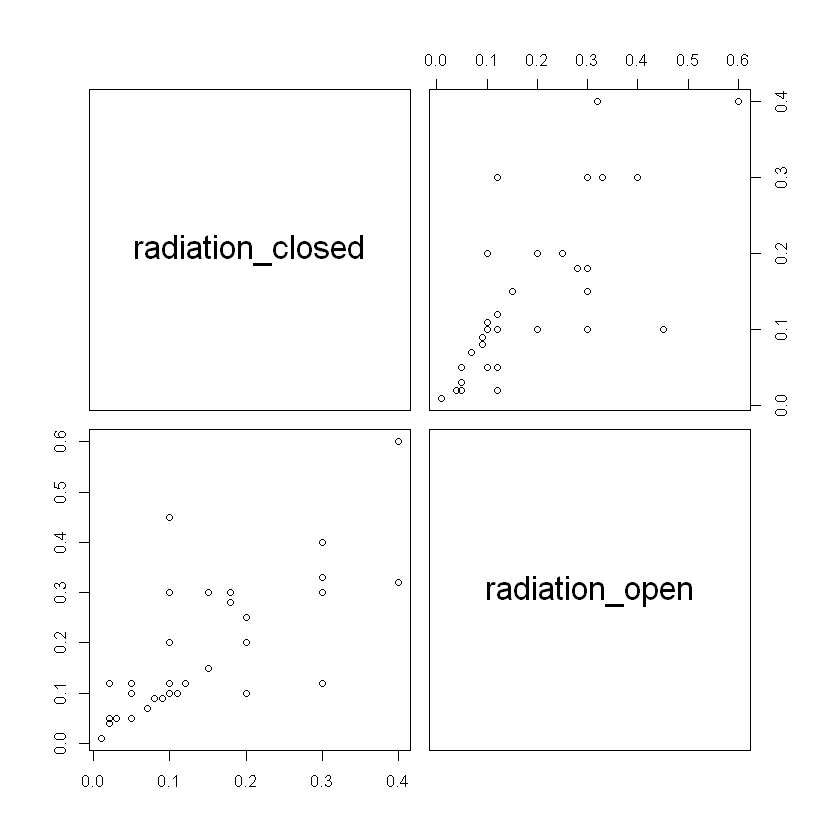

In [102]:
pairs(microwave[,2:3])

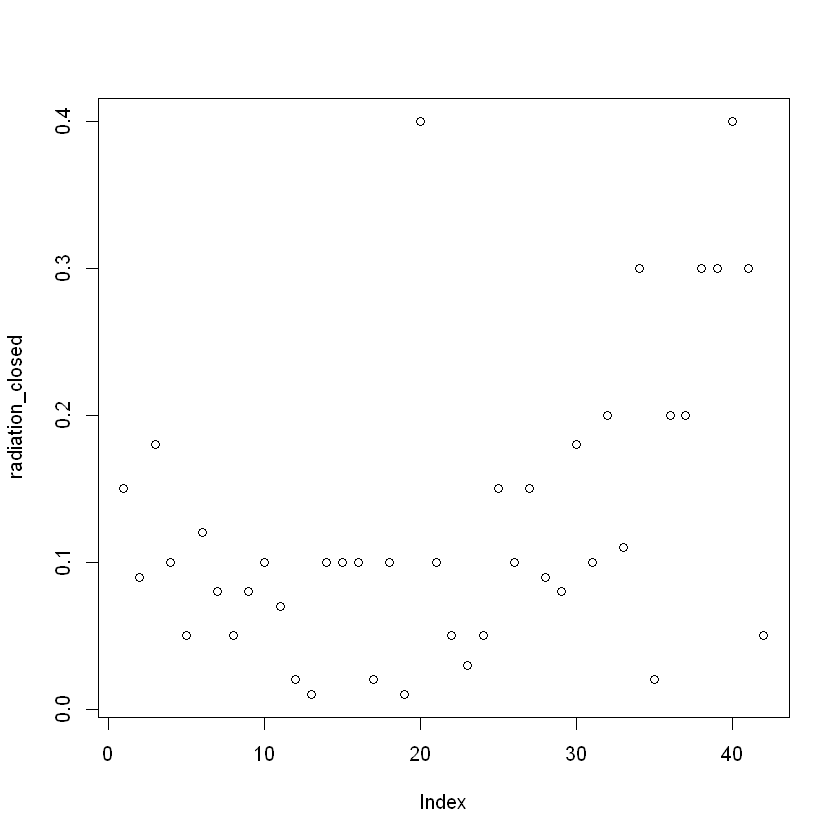

In [103]:
plot(radiation_closed)

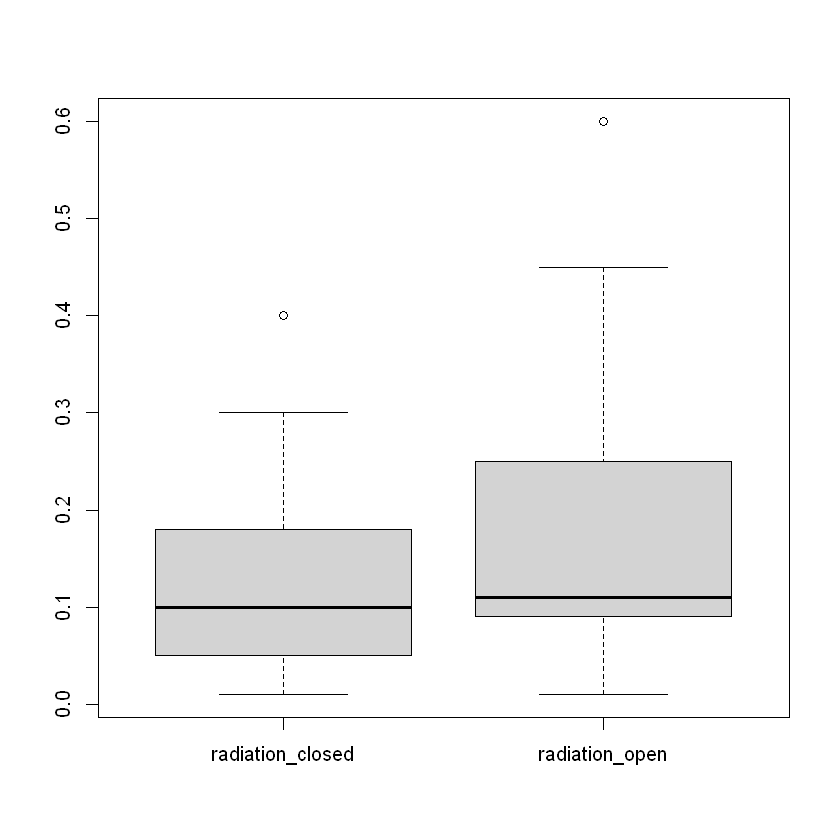

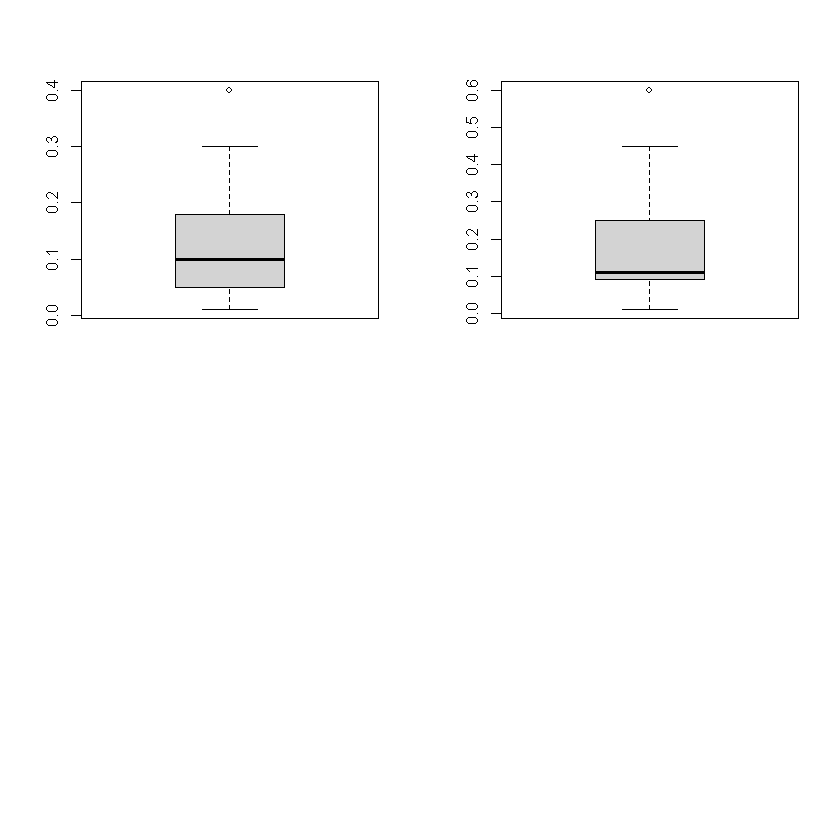

In [104]:
boxplot(microwave[, 2:3])
par(mfrow = c(2, 2))  # 1 satır, 2 sütunlu grafik düzeni
boxplot(radiation_closed)
boxplot(radiation_open)

In [105]:
rad_clos_new = radiation_closed[-which(radiation_closed == max(radiation_closed))]

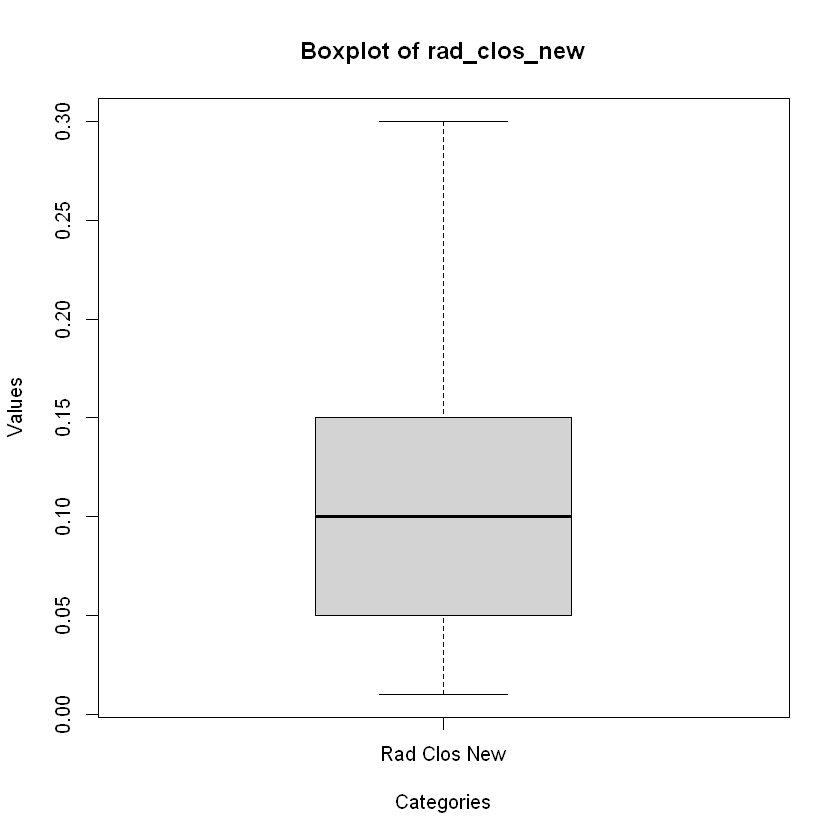

In [106]:
boxplot(rad_clos_new)

axis(1, at = 1, labels = c("Rad Clos New"))

title(main = "Boxplot of rad_clos_new")

xlabel <- "Categories"
ylabel <- "Values"
title(xlab = xlabel, ylab = ylabel)

In [107]:
# H0 : rad_clos_new normaldir.
# H1 : rad_clos_new normal degildir.

# p > alfa ise H0 red, p < alfa ise H0 kabul ediliyor

check_normality <- function(data, alpha = 0.05){
    # Apply the Shapiro-Wilk Test
    shapiro_result <- shapiro.test(data)
    
    # Print the p-value
    cat("Shapiro-Wilk Test p-value: ", shapiro_result$p.value, "\n")
    
    # Evaluate the test result with an if condition
    if (shapiro_result$p.value < alpha){
        cat("Reject the null hypothesis. The data is not normally distributed. \n")
    }
    else {
        cat("Fail to reject the null hypothesis. The data is normally distributed. \n")
    }
    
}

In [108]:
rad_closed_final <- radiation_closed^(1/4)
rad_open_final <- (radiation_open)^(1/3)

check_normality(rad_closed_final);check_normality(rad_open_final)

Shapiro-Wilk Test p-value:  0.2187987 

Fail to reject the null hypothesis. The data is normally distributed. 

Shapiro-Wilk Test p-value:  0.03446706 

Reject the null hypothesis. The data is not normally distributed. 


In [109]:
microwave_transformed = data.frame(oven_no, rad_closed_final, rad_open_final); head(microwave_transformed)
mean_rad = colMeans(microwave_transformed[, 2:3]); cat("Mean:\n", "Rad Closed:", mean_rad[1], "\n", "Rad Open:", mean_rad[2], "\n")
var_rad = cov(microwave_transformed[, 2:3]); cat("Variance:\n", "Rad Closed:", var_rad[1], "\n", "Rad Open:", var_rad[2], "\n")

,oven_no,rad_closed_final,rad_open_final
,<int>,<dbl>,<dbl>
1,1,0.6223330,0.6694330
2,2,0.5477226,0.4481405
3,3,0.6513556,0.6694330
4,4,0.5623413,0.4641589
5,5,0.4728708,0.4641589
6,6,0.5885662,0.4932424


Mean:

 Rad Closed: 0.5642575 

 Rad Open: 0.5138943 

Variance:

 Rad Closed: 0.01435023 

 Rad Open: 0.01304356 


In [110]:
mu_population = c(.562, .589)

In [111]:
n = 42
p = 2

In [112]:
hotelling_T_2 = n * t(mean_rad - mu_population)%*%solve(var_rad)%*%(mean_rad - mu_population)

In [113]:
critic = (n - 1)*p/(n-p)*qf(.95, p, n-p)

In [114]:
critic

[1] 6.62504

In [115]:
hotelling_T_2

38.72791


In [116]:
if ( critic < hotelling_T_2) {
    cat(sprintf("Reject the null hypothesis: There is evidence of a significant difference. \nBecause Hotelling T^2 : %s > Critic Value: %s", hotelling_T_2,critic))
    } else {
    cat(sprintf("Fail to reject the null hypothesis: There is no significant difference.\nBecause Hotelling T^2: %s < Critic Value: %s", hotelling_T_2, critic))
}

Reject the null hypothesis: There is evidence of a significant difference. 

Because Hotelling T^2 : 38.7279089745981 > Critic Value: 6.62504033530323

In [117]:
comparison_result = function(hotelling_T_2, critic) {
    # """
    # Perform the Hotelling T^2 test and print the result.

    # Parameters:

    # -hotelling_T_2: Numeric, the calculated Hotelling T^2 statistic.
    # -critic: Numeric, the critical value for comparison.

    # Returns:
    # None
    # """

    if ( critic < hotelling_T_2) {
    cat(sprintf("Reject the null hypothesis: There is evidence of a significant difference. \nBecause Hotelling T^2 : %s > Critic Value: %s", hotelling_T_2,critic))
    } else {
    cat(sprintf("Fail to reject the null hypothesis: There is no significant difference.\nBecause Hotelling T^2: %s < Critic Value: %s", hotelling_T_2, critic))
}
    }
    
comparison_result(hotelling_T_2=hotelling_T_2 ,critic= critic)

Reject the null hypothesis: There is evidence of a significant difference. 

Because Hotelling T^2 : 38.7279089745981 > Critic Value: 6.62504033530323

In [118]:
eigen(var_rad)

eigen() decomposition
$values
[1] 0.029525756 0.003139127

$vectors
          [,1]       [,2]
[1,] 0.6518269 -0.7583678
[2,] 0.7583678  0.6518269


In [119]:
mvdnorm = function(x, y, mu = c(0,0), p = 2, sigma = matrix(c(1, 0,0, 1), ncol = 2, byrow = TRUE)){
    xx = rbind(x, y)
    ff = vector()
    for( i in 1:(ncol(xx))){
        ff[i] = 1 /(2*pi^(p/2)*sqrt(det(sigma)))*exp(-1/2*t((xx[, i]) - (mu))%*%solve(sigma)%*%((xx[,i]) - mu))
    }
    ff
}

In [120]:
xx = seq(0, 1, length = 50)
yy = seq(0, 1, length = 50)
p = 2; mu = mean_rad; sigma = var_rad

In [121]:
fx = function(xx, yy){mvdnorm(x = xx, y = yy, p = p, mu = mu, sigma = sigma)}
z = outer(xx, yy, FUN = fx)

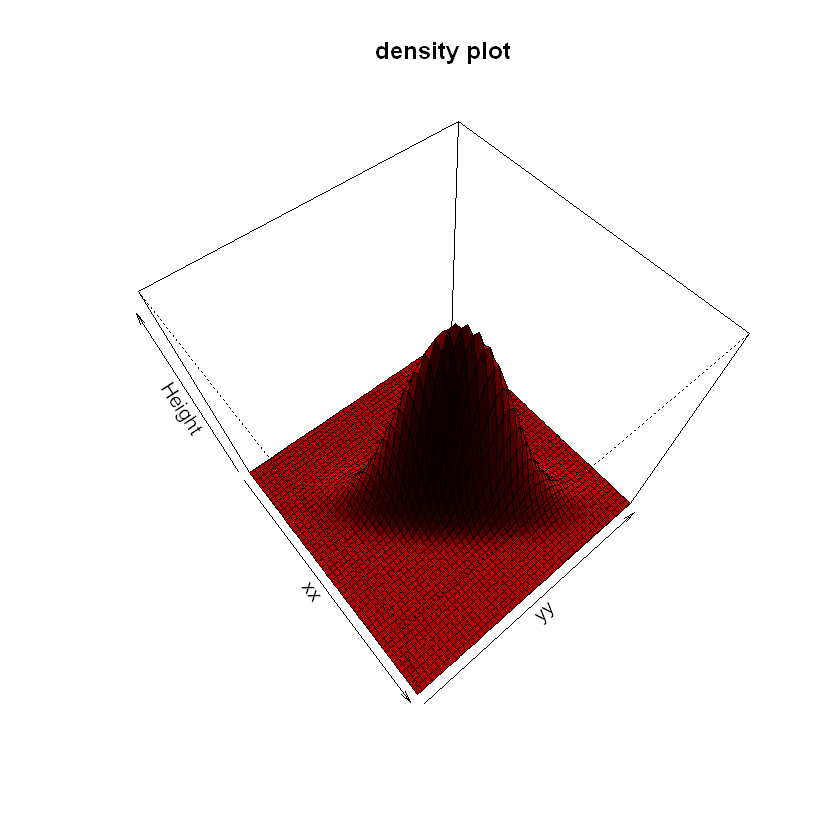

In [122]:
persp(xx, yy, z, main = "density plot", zlab = "Height", theta = 50, phi = 60, col = "red", shade = 0.5)

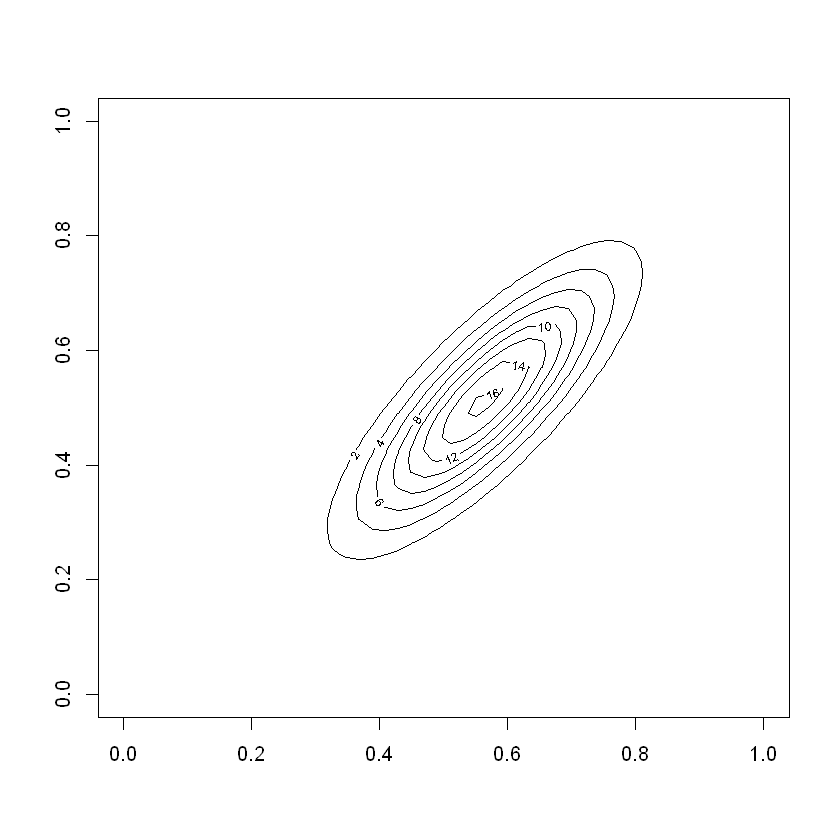

In [123]:
xcvt = contour(xx, yy, z)

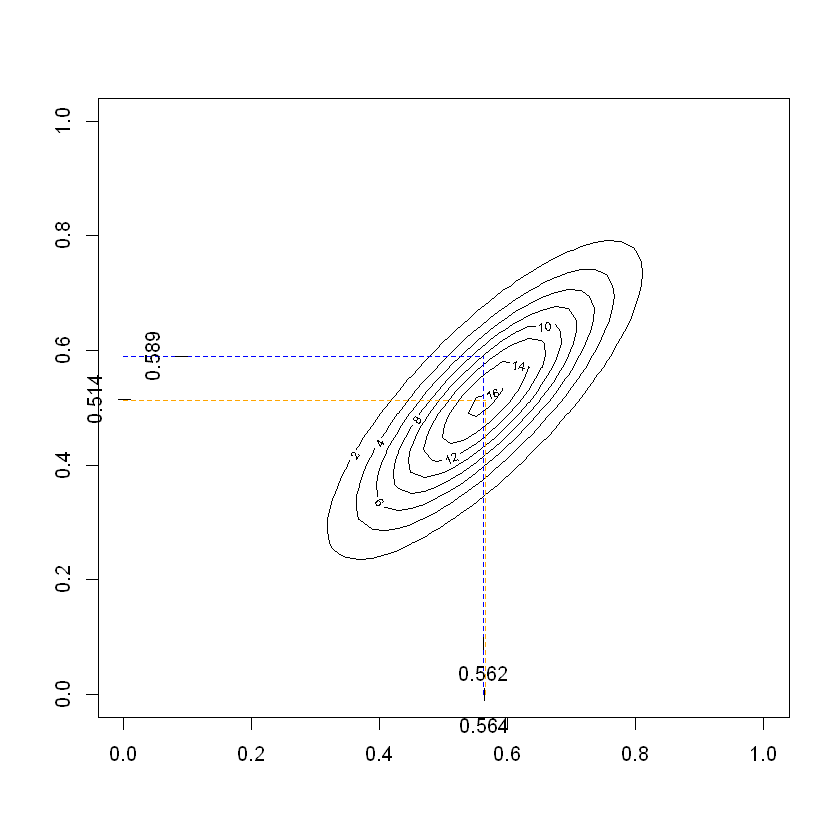

In [124]:
xcvt = contour(xx, yy, z)

lines(c(0, mean_rad[1]), c(mean_rad[2], mean_rad[2]), lty = 2, col = "orange")
lines(c(mean_rad[1], mean_rad[1]), c(0, mean_rad[2]), lty = 2, col = "orange")
axis(1, at = round(mean_rad[1], 3), pos = .01)
axis(2, at = round(mean_rad[2], 3), pos = .01)

lines(c(0, mu_population[1]), c(mu_population[2], mu_population[2]), lty = 2, col = "blue")
lines(c(mu_population[1], mu_population[1]), c(0, mu_population[2]), lty = 2, col = "blue")
axis(1, at = round(mu_population[1], 3), pos = 0.1)
axis(2, at = round(mu_population[2], 3), pos = 0.1)

In [125]:
### esanli guven araligi

ell_1 = c(1,0)
critic = (n - 1)*p/(n-p)*qf(.95, p, n-p)
var_esanli = t(ell_1)%*%var_rad%*%(ell_1) #

In [126]:
var_esanli

0.01435023


In [127]:
esanli_1 = c(t(ell_1)%*%mean_rad - sqrt(critic * var_esanli), t(ell_1)%*%mean_rad + sqrt(critic * var_esanli))
esanli_1

[1] 0.2559218 0.8725932

In [128]:
ell_2 = c(0, 1)
critic = (n - 1)*p/(n-p)*qf(.95, p, n-p)
var_esanli = t(ell_2)%*%var_rad%*%ell_2
esanli_2 = c(t(ell_2)%*%mean_rad - sqrt(critic * var_esanli), t(ell_2)%*%mean_rad + sqrt(critic * var_esanli))
esanli_2

[1] 0.1655621 0.8622264

 # hotelling T^2

In [129]:
# install.packages("MASS")
library("MASS")

In [130]:
packageVersion("MASS")

[1] '7.3.58.3'

In [131]:
df = data.frame(crabs)

In [132]:
help(crabs)

crabs {MASS},R Documentation


In [133]:
head(df)

,sp,sex,index,FL,RW,CL,CW,BD
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,M,1,8.1,6.7,16.1,19.0,7.0
2,B,M,2,8.8,7.7,18.1,20.8,7.4
3,B,M,3,9.2,7.8,19.0,22.4,7.7
4,B,M,4,9.6,7.9,20.1,23.1,8.2
5,B,M,5,9.8,8.0,20.3,23.0,8.2
6,B,M,6,10.8,9.0,23.0,26.5,9.8


In [134]:
tail(df)

,sp,sex,index,FL,RW,CL,CW,BD
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
195,O,F,45,21.3,18.4,43.8,48.4,20.0
196,O,F,46,21.4,18.0,41.2,46.2,18.7
197,O,F,47,21.7,17.1,41.7,47.2,19.6
198,O,F,48,21.9,17.2,42.6,47.4,19.5
199,O,F,49,22.5,17.2,43.0,48.7,19.8
200,O,F,50,23.1,20.2,46.2,52.5,21.1


In [135]:
cat(sprintf("Count of rows: %s , Count of columns: %s",dim(df)[1], dim(df)[2]))

Count of rows: 200 , Count of columns: 8

In [136]:
str(df)

'data.frame':	200 obs. of  8 variables:

 $ sp   : Factor w/ 2 levels "B","O": 1 1 1 1 1 1 1 1 1 1 ...

 $ sex  : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...

 $ index: int  1 2 3 4 5 6 7 8 9 10 ...

 $ FL   : num  8.1 8.8 9.2 9.6 9.8 10.8 11.1 11.6 11.8 11.8 ...

 $ RW   : num  6.7 7.7 7.8 7.9 8 9 9.9 9.1 9.6 10.5 ...

 $ CL   : num  16.1 18.1 19 20.1 20.3 23 23.8 24.5 24.2 25.2 ...

 $ CW   : num  19 20.8 22.4 23.1 23 26.5 27.1 28.4 27.8 29.3 ...

 $ BD   : num  7 7.4 7.7 8.2 8.2 9.8 9.8 10.4 9.7 10.3 ...


In [137]:
summary(df)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

In [138]:
numeric_cols = sapply(df, is.numeric) # for numeric column
print(sapply(df[, numeric_cols], sd))

    index        FL        RW        CL        CW        BD 

14.467083  3.495325  2.573340  7.118983  7.871955  3.424772 


In [139]:
filtered_df_B = subset(df, sp == "B")
filtered_df_O = subset(df, sp == "O")

In [140]:
summary(filtered_df_B);

 sp      sex        index            FL              RW              CL       
 B:100   F:50   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:  0   M:50   1st Qu.:13.0   1st Qu.:11.80   1st Qu.:10.60   1st Qu.:24.85  
                Median :25.5   Median :14.45   Median :12.00   Median :30.10  
                Mean   :25.5   Mean   :14.06   Mean   :11.93   Mean   :30.06  
                3rd Qu.:38.0   3rd Qu.:16.12   3rd Qu.:13.53   3rd Qu.:34.60  
                Max.   :50.0   Max.   :21.30   Max.   :16.90   Max.   :47.10  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:29.12   1st Qu.:10.40  
 Median :35.20   Median :12.60  
 Mean   :34.72   Mean   :12.58  
 3rd Qu.:40.30   3rd Qu.:14.90  
 Max.   :54.60   Max.   :20.00  

In [141]:
colMeans(filtered_df_B[, 3: ncol(df)]);colMeans(filtered_df_O[, 3: ncol(df)])

index     FL     RW     CL     CW     BD 
25.500 14.056 11.928 30.058 34.717 12.583

index     FL     RW     CL     CW     BD 
25.500 17.110 13.549 34.153 38.112 15.478

In [142]:
ncol(df)

[1] 8

# what is the difference blue and orange crabs in terms of FL, RW, CL, CW, BD?

In [144]:
# check of normality for FL, RW, CL, CW, BD
check_normality(df[,4]);check_normality(df[,5]);check_normality(df[,6]);check_normality(df[,7])

Shapiro-Wilk Test p-value:  0.2022775 

Fail to reject the null hypothesis. The data is normally distributed. 

Shapiro-Wilk Test p-value:  0.7646101 

Fail to reject the null hypothesis. The data is normally distributed. 

Shapiro-Wilk Test p-value:  0.3527449 

Fail to reject the null hypothesis. The data is normally distributed. 

Shapiro-Wilk Test p-value:  0.2541548 

Fail to reject the null hypothesis. The data is normally distributed. 


In [145]:
hotelling_t2_analizi <- function(grup1, grup2) {
  suppressWarnings({
    n1 <- nrow(grup1)
    n2 <- nrow(grup2)
    p <- ncol(grup1)  # veya ncol(grup2), her ikisi de aynı olmalı
    
    cat("Hotelling T2 Analizi:\n\n")
    
    # Normallik Testi
    norm_test_tum_veri <- sapply(1:p, function(i) shapiro.test(c(grup1[, i], grup2[,i]))$p.value)

    cat("Normallik Testi Sonuçları:\n")
    
    for (i in 1:p) {
      cat("\nDeğişken:", colnames(grup1)[i], "\n")
      cat("p-value =", norm_test_tum_veri[i], "\n")
      
      if (norm_test_tum_veri[i] >= 0.05) {
        cat("Değişken normal dağılıma uyar.\n")
      } else {
        cat("Değişken normal dağılıma uymaz. Lutfen verinize normalligi saglayacak uygun fonksiyonu uygulayiniz.")
        cat("\n")
        print("Normallik sağlanmadı. İslem durdurulacak.")
        cat("\n")
        return(NULL)
      }
      
      cat("\n")
    }
    
    # Ortalamalar
    x1_bar <- colMeans(grup1)
    x2_bar <- colMeans(grup2)
    
    # Varyanslar
    s1 <- cov(grup1)
    s2 <- cov(grup2)
    
    # Varyans homojenliği testi
    varyans_homo_testi <- var.test(grup1, grup2)
    varyans_homo <- varyans_homo_testi$p.value >= 0.05
    
    cat("Ortalamalar:\n")
    print(x1_bar)
    print(x2_bar)
    
    cat("\nVaryanslar:\n")
    print(s1)
    print(s2)
    
    cat("\nVaryans Homojenliği Testi:\n")
    print(varyans_homo_testi)
    
    # Varyans homojenliği bilgisi ekle
    cat("Varyans Homojenliği (p-value >= 0.05 ise homojendir):", varyans_homo, "\n\n")
    
    # Hotelling T2 ve c2 değerlerini hesapla
    if (varyans_homo) {
      Spooled <- ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)
      T2 <- (n1 * n2) / (n1 + n2) * t(x1_bar - x2_bar) %*% solve(Spooled) %*% (x1_bar - x2_bar)
      c2 <- (n1 + n2 - 2) * p / (n1 + n2 - p - 1) * qf(1 - 0.05, p, n1 + n2 - p - 1)
    } else {
      T2 <- (n1 * n2) / (n1 + n2) * t(x1_bar - x2_bar) %*% solve(s1 / n1 + s2 / n2) %*% (x1_bar - x2_bar)
      c2 <- (n1 + n2 - 2) * p / (n1 + n2 - p - 1) * qf(1 - 0.05, p, n1 + n2 - p - 1)
    }
    # Test istatistiği ile kritik değeri karşılaştır
    if (T2 > c2) {
      cat("Test İstatistiği(T2) kritik değerden büyük olduğu için yokluk hipotezi reddedilir.\n")
      
      # Varyans homojenliği kontrolü
      if (varyans_homo) {
        Spooled <- ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)
      } else {
        S1_inv <- solve(s1)
        S2_inv <- solve(s2)
        Spooled <- (n1 * S1_inv + n2 * S2_inv) / (n1 + n2)
      }
      
      # Eşanlı güven aralıkları ve farkları hesapla
      eşanlı_güven <- matrix(0, nrow = p, ncol = 2)
      farklar <- numeric(p)  # farklar vektörünü doğru boyutta başlat
      
      farklılık_yaratan <- character(0)
      D_0_düşmeyenler <- character(0)
      
      cat("\nHotelling T2 Değeri:", T2, "\n")
      cat("C2 Değeri:", c2, "\n")
      cat("\n")
      
      # Hata kontrolü ekleniyor
      if (sum(!is.na(farklar)) == 0) {
        cat("Uyarı: Gruplar arasında anlamlı farklılık bulunamadı.\n")
        return(NULL)
      }
      
      for (i in 1:p) {
        
        t_test <- t.test(grup1[, i], grup2[, i], var.equal = varyans_homo)
        eşanlı_güven[i, ] <- t_test$conf.int
        farklar[i] <- t_test$estimate
        
        # Hangi değişkenin farklılık yarattığını belirleme
        if (t_test$p.value < 0.05) {
          farklılık_yaratan <- c(farklılık_yaratan, colnames(grup1)[i])
        }
        
        # Eşanlı güven aralığından D=0 değerinin bu aralığa düşüp düşmediğine bakiyoruz
        ci_1 <- eşanlı_güven[i, 1]
        ci_2 <- eşanlı_güven[i, 2]
        
        if (!is.na(ci_1) & !is.na(ci_2)) {
          if (ci_1 <= 0 & ci_2 >= 0) {
            D_0_düşmeyenler <- c(D_0_düşmeyenler, colnames(grup1)[i])
          }
        }
      }
      
      cat("Uyarı: farklar vektörünün uzunluğu:", length(farklar))
      cat("\n")
      cat("\n")
      if (length(farklılık_yaratan) > 0) {
        cat("Farklılık Yaratan Değişken(ler):", paste(farklılık_yaratan, collapse = ", "), "\n\n")
        cat("Eşanlı Güven Aralıkları ve Farklar:\n")
        
        for (i in 1:p) {
          # Değişken normallik testini geçemediyse bu değişkeni atla
          
          cat("\nDeğişken:", colnames(grup1)[i], "\n")
          cat(colnames(grup1)[i], "Eşanlı Güven Aralığı:", eşanlı_güven[i, 1], ",", eşanlı_güven[i, 2], "\n")
          cat(colnames(grup1)[i], "Fark:", farklar[i], "\n")
          
          # Eşanlı güven aralığından D=0 değerinin bu aralığa düşüp düşmediğine bak
          ci_1 <- eşanlı_güven[i, 1]
          ci_2 <- eşanlı_güven[i, 2]
          
          if (!is.na(ci_1) & !is.na(ci_2)) {
            if (ci_1 <= 0 & ci_2 >= 0) {
              cat("Aralık", i, ": D = 0 bu aralığa düşüyor. Farkliligin kaynağı", colnames(grup1)[i], " degiskeni degildir.\n")
            } else {
              cat("Aralık", i, ": D = 0 bu aralığa düşmüyor. Farkliligi olusturan degiskenlerden biri", colnames(grup1)[i], " degiskenidir.\n")
            }
          }
        }
      } else {
        cat("Gruplar arasında anlamlı farklılık bulunamadı.\n")
      }
    } else {
      cat("Test İstatistiği(T2) kritik değerden küçük olduğu için yokluk hipotezi reddedilemez.\n")
    }
  })
}

In [146]:
# Veriyi uygun formata getir
grup_X <- as.matrix(df[df$sp == "B", c("FL", "RW", "CL", "CW", "BD")])
grup_Y <- as.matrix(df[df$sp == "O", c("FL", "RW", "CL", "CW", "BD")])

# Fonksiyonu çağır
hotelling_t2_analizi(grup_X, grup_Y)

Hotelling T2 Analizi:



Normallik Testi Sonuçları:



Değişken: FL 

p-value = 0.2022775 

Değişken normal dağılıma uyar.





Değişken: RW 

p-value = 0.7646101 

Değişken normal dağılıma uyar.





Değişken: CL 

p-value = 0.3527449 

Değişken normal dağılıma uyar.





Değişken: CW 

p-value = 0.2541548 

Değişken normal dağılıma uyar.





Değişken: BD 

p-value = 0.1956542 

Değişken normal dağılıma uyar.



Ortalamalar:

    FL     RW     CL     CW     BD 

14.056 11.928 30.058 34.717 12.583 

    FL     RW     CL     CW     BD 

17.110 13.549 34.153 38.112 15.478 



Varyanslar:

          FL        RW       CL       CW        BD

FL  9.118044  6.179527 20.74157 23.64237  9.158436

RW  6.179527  5.195168 14.10301 16.21093  6.322804

CL 20.741568 14.103006 47.64731 54.22052 21.004935

CW 23.642372 16.210933 54.22052 61.87456 23.952615

BD  9.158436  6.322804 21.00494 23.95262  9.411930

          FL        RW       CL       CW        BD

FL 10.729394  7.718697 21.90159 24.49089 

# By looking results, it is said that there is statistical significance in terms of FL, RW, CL, CW, BD

In [148]:
# Veriyi uygun formata getir
grup_X <- as.matrix(df[df$sex == "F", c("FL", "RW", "CL", "CW", "BD")])
grup_Y <- as.matrix(df[df$sex == "M", c("FL", "RW", "CL", "CW", "BD")])

# Fonksiyonu çağır
hotelling_t2_analizi(grup_X, grup_Y)

Hotelling T2 Analizi:



Normallik Testi Sonuçları:



Değişken: FL 

p-value = 0.2022775 

Değişken normal dağılıma uyar.





Değişken: RW 

p-value = 0.7646101 

Değişken normal dağılıma uyar.





Değişken: CL 

p-value = 0.3527449 

Değişken normal dağılıma uyar.





Değişken: CW 

p-value = 0.2541548 

Değişken normal dağılıma uyar.





Değişken: BD 

p-value = 0.1956542 

Değişken normal dağılıma uyar.



Ortalamalar:

    FL     RW     CL     CW     BD 

15.432 13.487 31.360 35.830 13.724 

    FL     RW     CL     CW     BD 

15.734 11.990 32.851 36.999 14.337 



Varyanslar:

          FL        RW       CL       CW        BD

FL 12.516945  9.382541 23.27271 25.34044 11.647911

RW  9.382541  7.511445 18.12493 19.92736  8.918901

CL 23.272707 18.124929 44.93010 49.29869 22.140263

CW 25.340444 19.927364 49.29869 54.47808 24.141596

BD 11.647911  8.918901 22.14026 24.14160 11.177196

          FL        RW       CL       CW       BD

FL 11.994994  7.244283 25.45926 27.85104 1